In [6]:
import fastai
from fastai.vision import *

# Dataset Download

In [4]:
#!cd /storage && mkdir pix2pix && cd pix2pix && mkdir data

!cd .. && mkdir storage && cd storage && mkdir pix2pix && cd pix2pix && mkdir data

In [5]:
!pip install wget

  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9681 sha256=a522917860324b512d073aaa107955db7aa2aade9449353c3f9105accbd8de60
  Stored in directory: /home/isischameleon/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget


In [6]:
# https://pypi.org/project/wget/
# https://docs.python.org/2/library/tarfile.html
import tarfile
import wget

downloaded_tars=list()
def get_tar(url: str, dest: str):
    filename = wget.download(url, dest)
    downloaded_tars.append({'path':dest, 'filename':filename})
    return filename

def _opentar(fname: str):
    tar=None
    if (fname.find('.tar') and fname.endswith('.gz')):
        tar = tarfile.open(fname, "r:gz")
    elif (fname.endswith(".tar")):
        tar = tarfile.open(fname, "r:")
    return tar

def untar(fname: str, dest:str='.'):
    tar = _opentar(fname)
    tar.list()
    tar.extractall(path=dest)
    tar.close()

def viewtar(fname: str):
    tar = _opentar(fname)
    tar = tarfile.open(fname, "r:gz")
    tar.list()
    tar.close()

def getuntarsize(fname: str):
    tar = _opentar(fname)
    tar = tarfile.open(fname, "r:gz")
    # to do
    tar.close()

In [13]:
 wget.download('http://efrosgans.eecs.berkeley.edu/pix2pix/datasets/maps.tar.gzhttp://efrosgans.eecs.berkeley.edu/pix2pix/datasets/maps.tar.gz', 'storage/pix2pix/data''storage/pix2pix/data')

FileNotFoundError: [Errno 2] No such file or directory: './storage/pix2pix/datastorage/pix2pix/data4720b93s.tmp'

In [9]:
url_dataset='http://efrosgans.eecs.berkeley.edu/pix2pix/datasets/maps.tar.gz'
# on gradient : dest='/storage/pix2pix/data'
dest='storage/pix2pix/data'

In [12]:
## ONLY EXECUTE FIRST TIME to download the dataset tar and extract it all
print(url_dataset)
print(dest)
filename=get_tar(url_dataset, dest)
print(filename)
print(dest)
untar(filename, dest)

http://efrosgans.eecs.berkeley.edu/pix2pix/datasets/maps.tar.gz
storage/pix2pix/data


FileNotFoundError: [Errno 2] No such file or directory: './storage/pix2pix/datan79c0x_9.tmp'

In [87]:
print(dest)
os.listdir(dest)
#!rm /storage/pix2pix/data/maps.tar (1).gz

/storage/pix2pix/data


['maps', 'maps.tar (1).gz']

In [90]:
for t in downloaded_tars:
    print(t.filename)
    print(t.path)

In [89]:
# Setting up dataset path for fastai
path=Path(dest + '/maps')
path


PosixPath('/storage/pix2pix/data/maps')

# PREPARING DATA FOR TRAINING

Each image will be loaded, rescaled, and split into the satellite and Google map elements. The result will be 1,097 color image pairs with the width and height of 256×256 pixels.

In [5]:
!ls ../storage/pix2pix/data/maps

train  val  Xs	Ys


In [10]:
# Set those variables if running independently from the data set download
dest='../storage/pix2pix/data'
path=Path(dest,'maps')
pathXs=path/'Xs'
pathYs=path/'Ys'

In [11]:
pathXs.is_dir()

True

In [62]:
il = ImageList.from_folder(path, presort=True).split_by_folder(train='train', valid='valid')


'), PosixPath('../storage/pix2pix/data/maps/train/558.jpg'), PosixPath('../storage/pix2pix/data/maps/train/479.jpg'), PosixPath('../storage/pix2pix/data/maps/train/829.jpg'), PosixPath('../storage/pix2pix/data/maps/train/201.jpg'), PosixPath('../storage/pix2pix/data/maps/train/866.jpg'), PosixPath('../storage/pix2pix/data/maps/train/129.jpg'), PosixPath('../storage/pix2pix/data/maps/train/998.jpg'), PosixPath('../storage/pix2pix/data/maps/train/465.jpg'), PosixPath('../storage/pix2pix/data/maps/train/511.jpg'), PosixPath('../storage/pix2pix/data/maps/train/383.jpg'), PosixPath('../storage/pix2pix/data/maps/train/713.jpg'), PosixPath('../storage/pix2pix/data/maps/train/587.jpg'), PosixPath('../storage/pix2pix/data/maps/train/312.jpg'), PosixPath('../storage/pix2pix/data/maps/train/273.jpg'), PosixPath('../storage/pix2pix/data/maps/train/457.jpg'), PosixPath('../storage/pix2pix/data/maps/train/323.jpg'), PosixPath('../storage/pix2pix/data/maps/train/7.jpg'), PosixPath('../storage/pix2pix

TypeError: 'ItemLists' object is not subscriptable

In [67]:
type(il)

fastai.data_block.ItemLists

In [38]:
ImageImageList

In [47]:
iil = ImageImageList.from_folder(pathXs, presort=True).split_by_folder(train='train', valid='valid')

ata/maps/Xs/train/309.jpg'), PosixPath('../storage/pix2pix/data/maps/Xs/train/662.jpg'), PosixPath('../storage/pix2pix/data/maps/Xs/train/1043.jpg'), PosixPath('../storage/pix2pix/data/maps/Xs/train/32.jpg'), PosixPath('../storage/pix2pix/data/maps/Xs/train/375.jpg'), PosixPath('../storage/pix2pix/data/maps/Xs/train/596.jpg'), PosixPath('../storage/pix2pix/data/maps/Xs/train/840.jpg'), PosixPath('../storage/pix2pix/data/maps/Xs/train/521.jpg'), PosixPath('../storage/pix2pix/data/maps/Xs/train/658.jpg'), PosixPath('../storage/pix2pix/data/maps/Xs/train/1093.jpg'), PosixPath('../storage/pix2pix/data/maps/Xs/train/93.jpg'), PosixPath('../storage/pix2pix/data/maps/Xs/train/170.jpg'), PosixPath('../storage/pix2pix/data/maps/Xs/train/438.jpg'), PosixPath('../storage/pix2pix/data/maps/Xs/train/85.jpg'), PosixPath('../storage/pix2pix/data/maps/Xs/train/267.jpg'), PosixPath('../storage/pix2pix/data/maps/Xs/train/92.jpg'), PosixPath('../storage/pix2pix/data/maps/Xs/train/82.jpg'), PosixPath('../

In [48]:
iil.valid

ImageImageList (1098 items)
Image (3, 600, 600),Image (3, 600, 600),Image (3, 600, 600),Image (3, 600, 600),Image (3, 600, 600)
Path: ../storage/pix2pix/data/maps/Xs

In [49]:
iil.train

ImageImageList (1096 items)
Image (3, 600, 600),Image (3, 600, 600),Image (3, 600, 600),Image (3, 600, 600),Image (3, 600, 600)
Path: ../storage/pix2pix/data/maps/Xs

In [17]:
iil.items[10]

PosixPath('../storage/pix2pix/data/maps/Xs/train/1007.jpg')

In [50]:
iil.valid.items[10]

PosixPath('../storage/pix2pix/data/maps/Xs/valid/1007.jpg')

In [ ]:
On writing your won item list : https://docs.fast.ai/data_block.html#ItemList

In [51]:
iil.lists[0]

ImageImageList (1096 items)
Image (3, 600, 600),Image (3, 600, 600),Image (3, 600, 600),Image (3, 600, 600),Image (3, 600, 600)
Path: ../storage/pix2pix/data/maps/Xs

In [52]:
iil.lists[1]

ImageImageList (1098 items)
Image (3, 600, 600),Image (3, 600, 600),Image (3, 600, 600),Image (3, 600, 600),Image (3, 600, 600)
Path: ../storage/pix2pix/data/maps/Xs

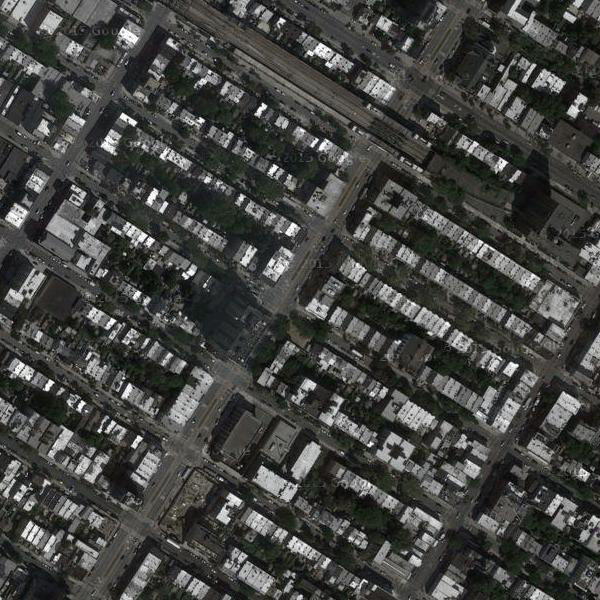

In [24]:
iil.lists[1][10]

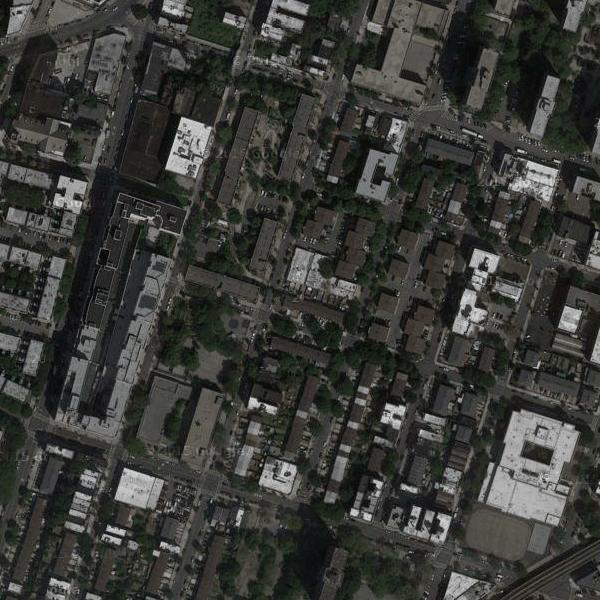

In [53]:
iil.lists[0][10]

In [68]:
index=iil.train.items[0].parts.index('Xs')
new_path = Path(*iil.train.items[0].parts[:index]).joinpath(Path('Ys',*iil.train.items[0].parts[index+1:]))
print(new_path)
type(iil.train.items[0])

../storage/pix2pix/data/maps/Ys/train/1.jpg


pathlib.PosixPath

In [73]:
def getYsfromXs(x:Path, xFolder:str='Xs', yFolder:str='Ys'):
    index=x.parts.index(xFolder)
    y=Path(*x.parts[:index]).joinpath(Path(yFolder,*x.parts[index+1:]))
    return y

myPath=getYsfromXs(iil.train.items[1])
print(myPath)

../storage/pix2pix/data/maps/Ys/train/10.jpg


In [74]:
def get_data(iil:ImageImageList, bs:int,size:int):
    ''' Takes an ImageImageList in iil and return a databunch with images of size=size and training batch size= bs '''
    data = (iil.label_from_func(getYsfromXs)
           .transform(get_transforms(max_zoom=2.), size=size, tfm_y=True)
           .databunch(bs=bs).normalize(imagenet_stats, do_y=True))

    data.c = 3
    return data

In [75]:
bs = 16
size = 100

In [76]:
data = get_data(iil=iil, bs=16,size=100)

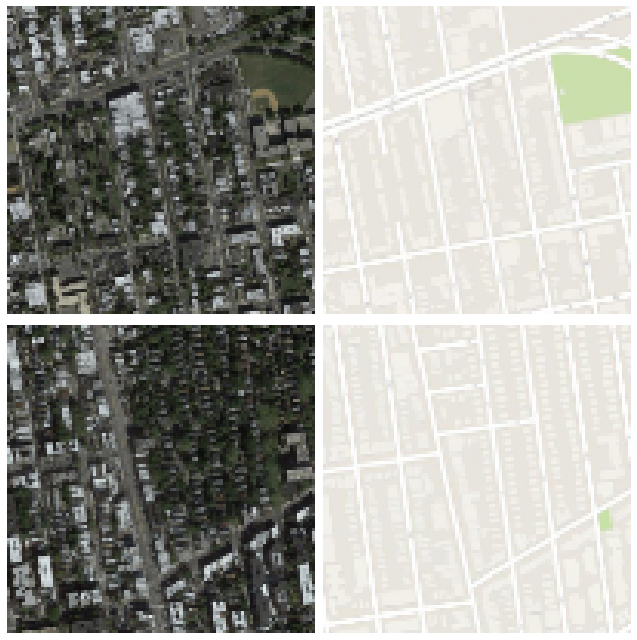

In [77]:
data.show_batch(ds_type=DatasetType.Valid, rows=2, figsize=(9,9))

In [78]:
# The tuple of Images Xs and Ys
t = data.valid_ds[0]